In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
df= pd.read_json('C:\\Users\\DELL\\Downloads\\sarcasm.json')

In [10]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english',max_features=None)

vectorized = tf.fit_transform(df['headline']).toarray()
vectorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
df_vectorized = pd.DataFrame(vectorized,columns=tf.get_feature_names_out())
df_vectorized.head()

,00,000,00000000001,00003,000th,025,03,047,071,10,...,zoologist,zoologists,zoomed,zoroastrianism,zsa,zucker,zuckerberg,zz,éclairs,ünited
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [25]:
df_pca = pca.fit_transform(df_vectorized)

In [27]:
df_pca

array([[-0.00939344, -0.01059836],
       [-0.00818287, -0.00850631],
       [-0.01405119, -0.01400245],
       ...,
       [-0.00052834, -0.01586916],
       [ 0.01174133, -0.00664537],
       [-0.00676957, -0.01482848]])

In [29]:
from sklearn.cluster import KMeans

num_clusters=2
kmeans=KMeans(n_clusters=2,n_init=5,max_iter=300,random_state=50)

In [31]:
kmeans.fit(df_pca)

KMeans(n_clusters=2, n_init=5, random_state=50)

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
results = pd.DataFrame()
results['documents'] = df['headline']
results['cluster'] = kmeans.labels_

In [34]:
results.head()

,documents,cluster
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,0
3,"boehner just wants wife to listen, not come up...",0
4,j.k. rowling wishes snape happy birthday in th...,0


In [35]:
results['cluster'].value_counts()

0    25033
1     1676
Name: cluster, dtype: int64

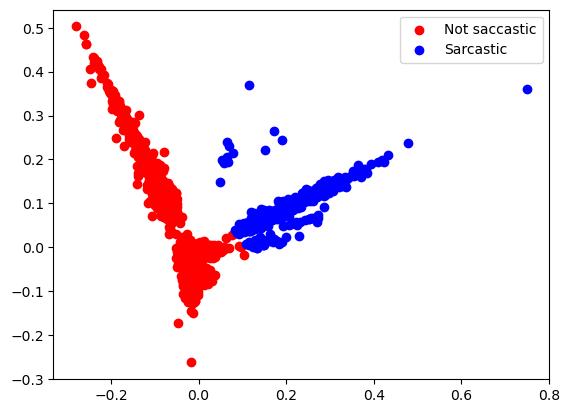

In [37]:
cluster=["Not saccastic","Sarcastic"]
colors=["red","blue"]
for i in range(num_clusters):
    plt.scatter(df_pca[kmeans.labels_==i,0],
               df_pca[kmeans.labels_==i,1],
               color=colors[i],
               label=f'{cluster[i]}')
    
plt.legend()
plt.show()